In [12]:
import time

import numpy as np
import matplotlib.pyplot as plt

from scipy import signal, fft

from sklearn.metrics import r2_score

from ymaeda_tools.read_dGM import read_Mseq1, read_dseq1
from ymaeda_tools.inversion import winv_lstsq
from ymaeda_tools.dft import exifft_timeshift

# This script verifies that the python functions performing the linear inversion return
# the same results as the original YMAEDA_TOOLS functions

STARTTIME = time.time()

base = "/Volumes/MAC Backup/Final Year Projects/Shinmoedake Data/kirishima_invert/inversion_results_dump_new/"
main_dir = base + "inversion_result_residuals117/t60_p100/x-10900y-121100z1000/"

# time step used by YMAEDA_TOOLS
dt = 0.1 
# frequency step size used by YMAEDA_TOOLS
df = 0.002441406 
# frequency half space used by YMAEDA_TOOLS
f = np.arange(0, df*2049, df) 
# frequency full space used by YMAEDA_TOOLS
F = np.arange(0, df*4096, df) 

# read the original M.seq1 output from YMAEDA_TOOLS
mt = read_Mseq1(main_dir)

t = np.arange(0, dt * len(mt), dt)

# load the G and d data and performs inversion using least squares method using the python codes
mest = winv_lstsq(main_dir, w = 0)

# ifft to time domain. Remember the 1/dt factor, and use time shift of 1000 indices
m = exifft_timeshift(mest, 1000) / dt 
mr = np.real(m)

print("Time elapsed: {:.3f}s".format(time.time() - STARTTIME))

Time elapsed: 27.190s


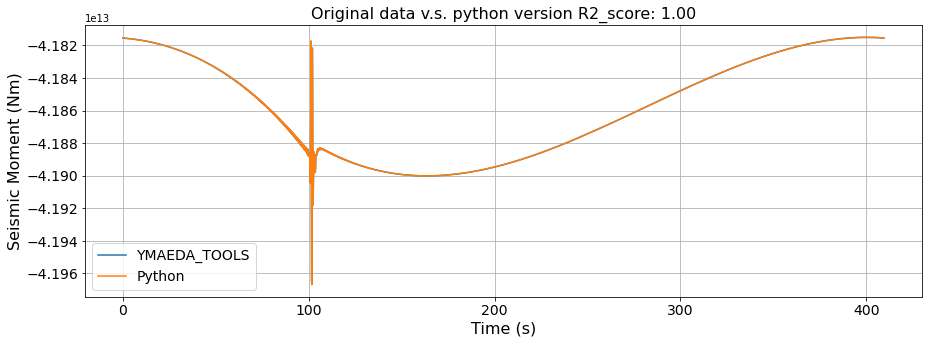

In [13]:
plt.figure(figsize = (15, 5))
plt.title("Original data v.s. python version R2_score: {:.2f}".format(r2_score(mt, mr)), fontsize = 16)
plt.plot(t, mt)
plt.plot(t, mr)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Seismic Moment (Nm)', fontsize = 16)
plt.legend(["YMAEDA_TOOLS", "Python"], fontsize = 14)
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

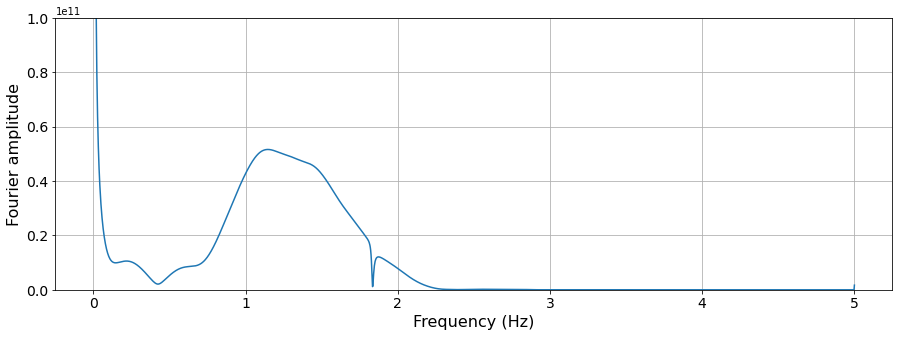

In [14]:
# Check where the most interesting portion of the spectrum is
plt.figure(figsize = (15, 5))
plt.plot(f, np.sqrt(np.abs(mest[:,0]**2 + mest[:,1]**2)))
plt.xlabel("Frequency (Hz)", fontsize = 16)
plt.ylabel("Fourier amplitude", fontsize = 16)
plt.grid(True)
plt.ylim([0, 1e11])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

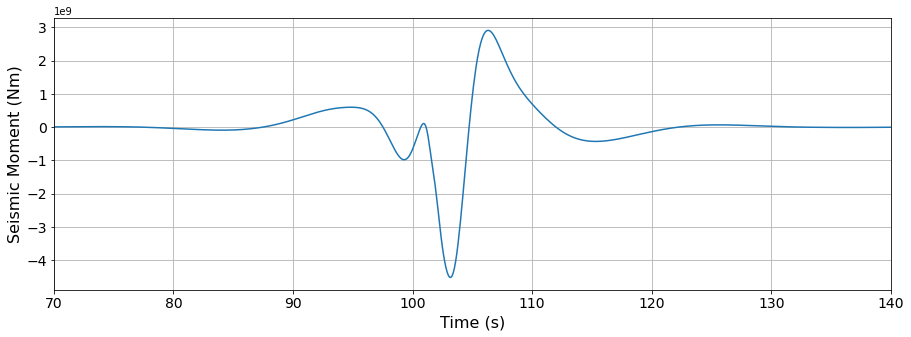

In [15]:
# Try filtering out the ultra-long period signal...

b, a = signal.iirfilter(2, [0.5, 2.5], btype='bandpass', analog=False, ftype='butter', fs=100, output='ba')
mt_filt = signal.filtfilt(b, a, mt)

plt.figure(figsize = (15, 5))
plt.plot(t, mt_filt)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Seismic Moment (Nm)', fontsize = 16)
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim([70, 140])
plt.show()

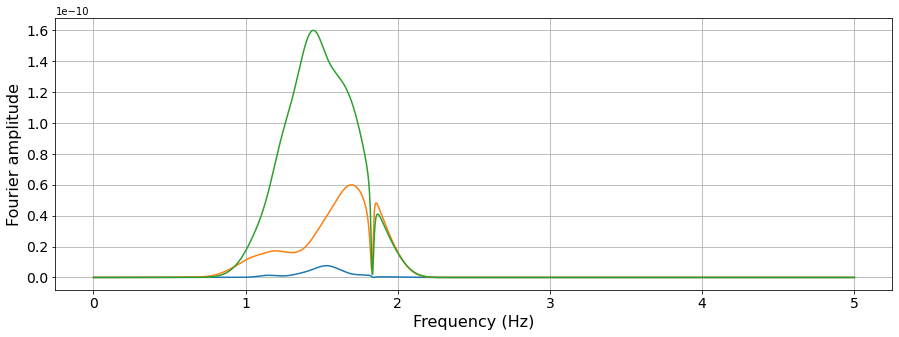

In [26]:
# base directories
base_dir = "/Volumes/MAC Backup/Final Year Projects/Shinmoedake Data/kirishima_invert/"
parent_dir = "inversion_results_dump_new/inversion_result_residuals117/t60_p100/x-10900y-121100z1000/"

# target directory
target_dir = "inv_data_dir_supershort_filtered/"

# wanted station
station = "EV.SMN"

def get_seq1(directory_name):
    if "contribution" in directory_name or "green" in directory_name:
        E_suffix = ".E.sac.M.seq1"
        N_suffix = ".N.sac.M.seq1"
        U_suffix = ".U.sac.M.seq1"
    else:
        E_suffix = ".E.sac.seq1"
        N_suffix = ".N.sac.seq1"
        U_suffix = ".U.sac.seq1"
        
    directory_name = base_dir + parent_dir + directory_name + target_dir
    
    E = read_dseq1(directory_name, station + E_suffix)
    N = read_dseq1(directory_name, station + N_suffix)
    U = read_dseq1(directory_name, station + U_suffix)
    
    t = np.arange(0, len(E) * dt, dt)
    
    return t, E, N, U

t, E, N, U = get_seq1("data_syn/")

fE, aE = signal.periodogram(E, fs = 1/(t[2]-t[1]))
fN, aN = signal.periodogram(N, fs = 1/(t[2]-t[1]))
fU, aU = signal.periodogram(U, fs = 1/(t[2]-t[1]))

plt.figure(figsize = (15, 5))
plt.plot(fE, aE)
plt.plot(fN, aN)
plt.plot(fU, aU)
plt.xlabel("Frequency (Hz)", fontsize = 16)
plt.ylabel("Fourier amplitude", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()